##### Loan Application Status

In [1]:
!pip install imbalanced-learn

###### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
from sklearn import metrics
from sklearn.metrics import make_scorer
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,auc, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support
from sklearn.metrics import f1_score,precision_recall_curve

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE


###### Load Dataset

In [3]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

###### Dimension of Dataset

In [4]:
df.shape

(614, 13)

*Observation :*<br>*In Dataset there are 614 rows and 13 columns*

###### Sample of Dataset

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


###### Breif about Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


*Observation :*<br>*In Dataset there are 4 float type columns 1 int type column and 8 object type columns*<br>
*All columns do not have 614 non null values so there are missing values in the dataset*

###### Statistical Summary of Data

###### ---for numerical variable

In [7]:
df.describe(exclude='object')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###### ---for categorical variable

In [8]:
df.describe(include=[object]) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001032,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


*Observation :*<br>*Total count for all columns should be 614 but in the statistical summary for*
<br> *both categorical and numerical some columns not have count 614 so those columns have missing values*
<br>*In some columns max and min values have big difference so there are outliers.*<br>*In some columns all quartlies values are same.*

###### check for unique values in columns

In [9]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

*Observation :*<br>*Loan_id, ApplicantIncome,CoapplicantIncome,LoanAmount columns have move than 20 unnique values.*<br>*so they are countinues values*<br>
*and rest have less than 20 unique value so they are categorical columns*

###### check for missing values in columns

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
print("Total missing values :",df.isnull().sum().sum())

Total missing values : 149


*Observation :*<br>*All columns have missing values except columns*
<br>*Loan_Id,Education,ApplicantIncome,CoapplicantIncome,Property_Area and Loan_Status*
<br>*Total missing values in dataset are 149.*

###### total % missing values in columns

In [12]:
print("Total % of MIssing Values in Columns :")
df.isnull().sum()/df.shape[0]*100 

Total % of MIssing Values in Columns :


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

*Observation :*<br>*Gender,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term columns have less than 6% data missing*
<br>*Credit_History column have 8% data missing*

###### check for duplicate rows

In [13]:
sum(df.duplicated())

0

*Observation :*<br>*No duplicate rows*

###### check for zeros in columns

In [14]:
print(df[df==0].count())
print('Total zeros in Dataset:', df[df==0].count().sum())

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64
Total zeros in Dataset: 362


*Observation :*<br>*CoapplicantIncome and Credit_History column have zero values.*

###### total % of zeros in columns

In [15]:
print("Total % of Zeros as Value in Columns")
df[df==0].count()/df.shape[0]*100   

Total % of Zeros as Value in Columns


Loan_ID               0.000000
Gender                0.000000
Married               0.000000
Dependents            0.000000
Education             0.000000
Self_Employed         0.000000
ApplicantIncome       0.000000
CoapplicantIncome    44.462541
LoanAmount            0.000000
Loan_Amount_Term      0.000000
Credit_History       14.495114
Property_Area         0.000000
Loan_Status           0.000000
dtype: float64

*Observation :*<br>*CoapplicantIncome column have 44% and Credit_History column have 14% zero values*

###### Identification of numbers

###### check for numerical variables

In [16]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  5


In [17]:
for feature in numerical_features:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is ApplicantIncome and number of numerical are 505
The feature is CoapplicantIncome and number of numerical are 287
The feature is LoanAmount and number of numerical are 204
The feature is Loan_Amount_Term and number of numerical are 11
The feature is Credit_History and number of numerical are 3


In [18]:
df[numerical_features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


###### ---check for descrete variable

In [19]:
descrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Descrete Variables Count: {}".format(len(descrete_feature)),"\n")

for feature in descrete_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))
    
    
for feature in descrete_feature:
    print("\n",feature," : ", df[feature].unique())

Descrete Variables Count: 2 

The feature is Loan_Amount_Term and number of numerical are 11
The feature is Credit_History and number of numerical are 3

 Loan_Amount_Term  :  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]

 Credit_History  :  [ 1.  0. nan]


In [20]:
df[descrete_feature].head()

,Loan_Amount_Term,Credit_History
0,360.0,1.0
1,360.0,1.0
2,360.0,1.0
3,360.0,1.0
4,360.0,1.0


###### ---check for countinuous variable

In [21]:
continuous_feature=[feature for feature in numerical_features if feature not in descrete_feature ]
print("Continuous Variables Count {}".format(len(continuous_feature)),"\n")

for feature in continuous_feature:
    print('The feature is:  {}     and number of numerical are:  {}'.format(feature,len(df[feature].unique())))

Continuous Variables Count 3 

The feature is:  ApplicantIncome     and number of numerical are:  505
The feature is:  CoapplicantIncome     and number of numerical are:  287
The feature is:  LoanAmount     and number of numerical are:  204


In [22]:
df[continuous_feature].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


*Observation :*<br>*ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History columns are Numerical variables*<br>*ApplicantIncome,CoapplicantIncome,LoanAmount are countinuous features and Loan_Amount_Term,Credit_History are discrete features*

###### check for categorical variable

In [23]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of Categorical variables: ', len(categorical_features))

Number of Categorical variables:  8


In [24]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Loan_ID and number of categories are 614
The feature is Gender and number of categories are 3
The feature is Married and number of categories are 3
The feature is Dependents and number of categories are 5
The feature is Education and number of categories are 2
The feature is Self_Employed and number of categories are 3
The feature is Property_Area and number of categories are 3
The feature is Loan_Status and number of categories are 2


In [25]:
df[categorical_features].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


###### ---check for binary variable

In [26]:
binary_feature=[feature for feature in categorical_features if len(df[feature].unique())==2 or len(df[feature].unique())<2 and feature not in date_feature]
print("Binary Variables Count: {}".format(len(binary_feature)))

Binary Variables Count: 2


In [27]:
for feature in binary_feature:
    print(feature," : ", df[feature].unique())

Education  :  ['Graduate' 'Not Graduate']
Loan_Status  :  ['Y' 'N']


In [28]:
df[binary_feature].head()

,Education,Loan_Status
0,Graduate,Y
1,Graduate,N
2,Graduate,Y
3,Not Graduate,Y
4,Graduate,Y


###### ---check for nominal variable

In [29]:
nominal_feature=[feature for feature in categorical_features if feature not in binary_feature]
print("Nominal feature Count {}".format(len(nominal_feature)))

Nominal feature Count 6


In [30]:
for feature in nominal_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is Loan_ID and number of numerical are 614
The feature is Gender and number of numerical are 3
The feature is Married and number of numerical are 3
The feature is Dependents and number of numerical are 5
The feature is Self_Employed and number of numerical are 3
The feature is Property_Area and number of numerical are 3


In [31]:
nominalfeature=['Gender','Married','Dependents','Self_Employed','Property_Area']
for feature in nominalfeature :
    print(feature," : ", df[feature].unique())

Gender  :  ['Male' 'Female' nan]
Married  :  ['No' 'Yes' nan]
Dependents  :  ['0' '1' '2' '3+' nan]
Self_Employed  :  ['No' 'Yes' nan]
Property_Area  :  ['Urban' 'Rural' 'Semiurban']


In [32]:
df[nominal_feature].head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,Property_Area
0,LP001002,Male,No,0,No,Urban
1,LP001003,Male,Yes,1,No,Rural
2,LP001005,Male,Yes,0,Yes,Urban
3,LP001006,Male,Yes,0,No,Urban
4,LP001008,Male,No,0,No,Urban


*Observation :*<br>*Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status are categorical variables*<br>*Loan_ID	Gender	Married	DependentsSelf_Employed	Property_Area are nominal features and Education,Loan_Status are binary features*

###### check for cardinality

###### ---for categorical variables

Text(0.5, 1.0, 'Cardinality')

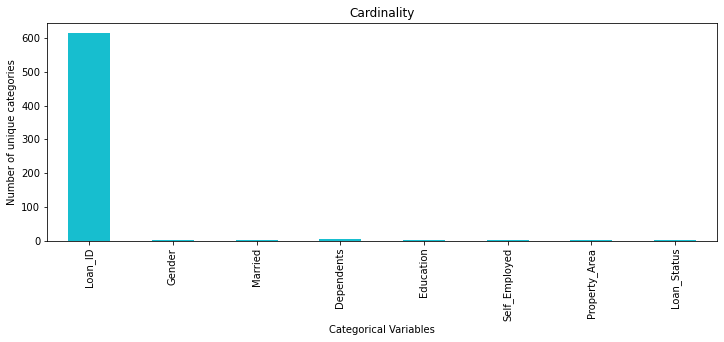

In [33]:
df[categorical_features].nunique().plot.bar(figsize=(12,4),color='#17becf')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

*Observation :*<br>*All columns have low cardinality Except Loan_ID*

###### check for outliers 

###### ---for numerical variables

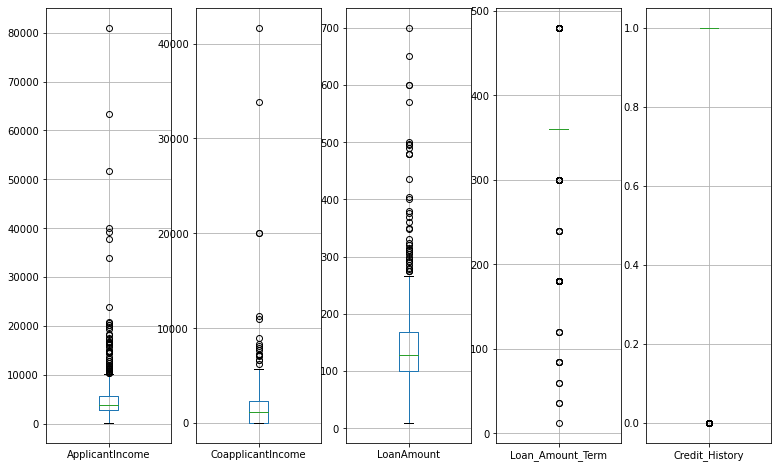

In [34]:
fig, pltcan=plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(13,8))
for predcol , i in zip(numerical_features, range(len(numerical_features))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

*Observation :*<br>*Loan_Amount_Term and Credit_History have unique values 11 an 2 respectively, so can not count as outiler.*<br>*ApplicantIncome,CoapplicantINcome and LoanAmount have outliers*

###### check for skewness

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64


<AxesSubplot:>

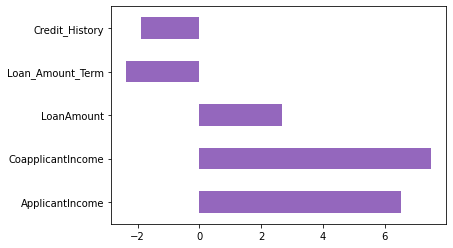

In [35]:
print(df.skew())
df.skew().plot(kind='barh',color='#9467bd')

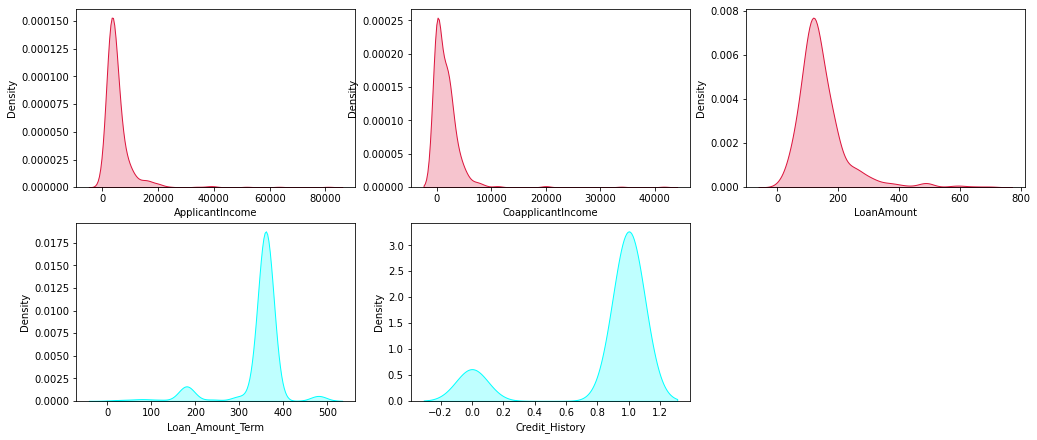

In [36]:
#Visualization of Skewness (numerical variable)
plt.figure(figsize=(17,19))
plt.subplot(5,3,1)
sns.kdeplot(df['ApplicantIncome'],color='crimson',shade=True)
plt.subplot(5,3,2)
sns.kdeplot(df['CoapplicantIncome'],color='crimson',shade=True)
plt.subplot(5,3,3)
sns.kdeplot(df['LoanAmount'],color='crimson',shade=True)
plt.subplot(5,3,4)
sns.kdeplot(df['Loan_Amount_Term'],color='aqua',shade=True)
plt.subplot(5,3,5)
sns.kdeplot(df['Credit_History'],color='aqua',shade=True)

plt.show()


*Observation :*<br>*ApplicantIncome, CoapplicantIncome,LoanAmount have light right skewness*<br>*Loan_Amount_Term,Credit_History have left skewness*

###### Identify Target and Feature Variable

*Prediction-*<br>*Loan_Status (Approve or Reject)*

*Targe Variable (Depaendent Features)* <br>            *-Loan_Status* <br>
*Predictors (Independent Features)*<br>                 *- All variables* 

###### Univariate Analysis

###### 1. Loan_Status variable

<AxesSubplot:ylabel='Loan_Status'>

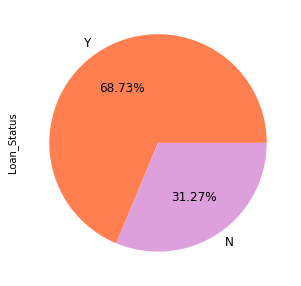

In [37]:
df['Loan_Status'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colors = ['coral','plum'])

*Observation :*<br>*68% people have taken loan*<br>*31% have no loan amount*

###### 2. Loan_ID, LoanAmount, Loan_Amount_Term variable

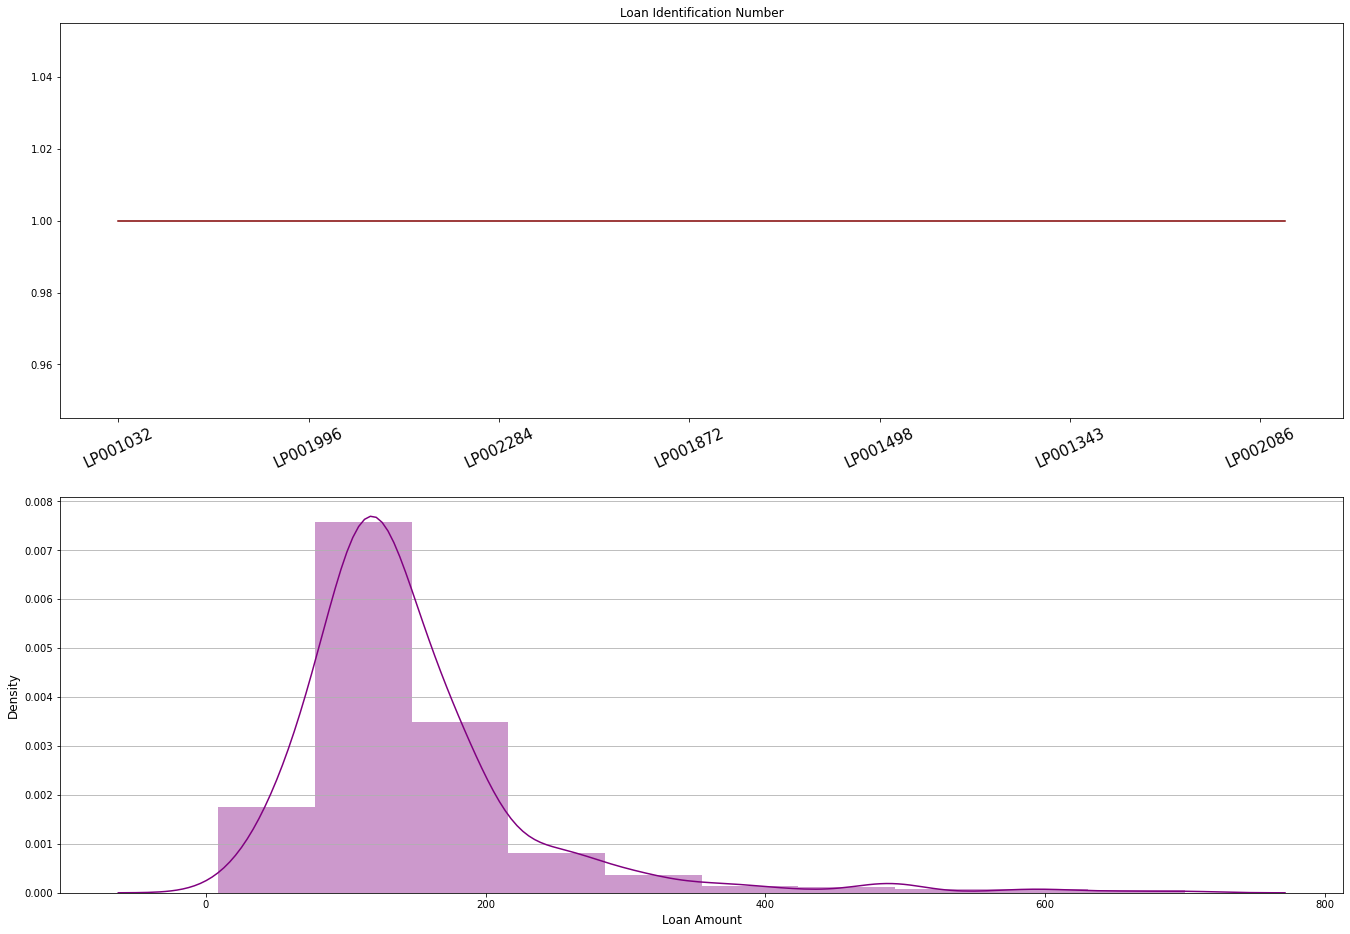

In [38]:
plt.figure(figsize=(15,15))
plt.subplot(211)
df['Loan_ID'].value_counts().plot(kind='line', title='Loan Identification Number', figsize=(23,16),color='maroon')
plt.xticks(rotation=25,fontsize=15)
plt.subplot(212)
sns.distplot(df['LoanAmount'],hist = True, bins=10, kde=True, color='purple')
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y')

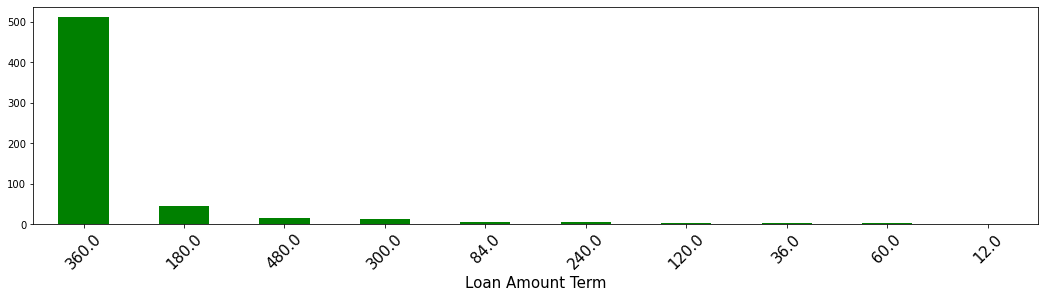

In [39]:
df['Loan_Amount_Term'].value_counts().plot(kind='bar', figsize=(18,4),color='green')
plt.xticks(rotation=45, fontsize=15)
plt.xlabel('Loan Amount Term', fontsize=15)
plt.show()

*Observation :*<br>*Loan ID is unique*<br>*max people have taken loan amount in the range of 50 to 150*
<br>*Loan amount term is the highest on 360*

###### 3. ApplicantIncome, CoapplicantIncome variable

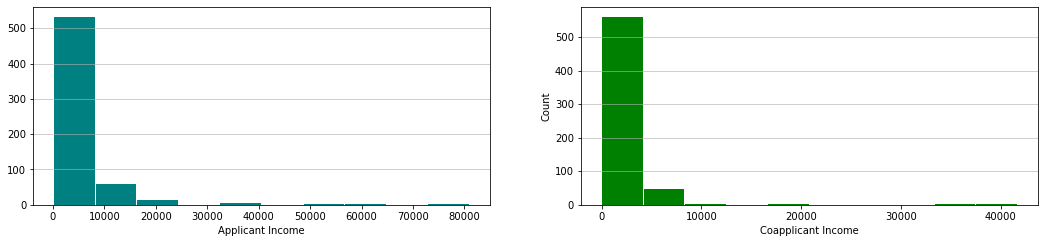

In [40]:
plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
plt.hist(df['ApplicantIncome'], rwidth = 0.98,color='teal')
plt.xlabel('Applicant Income', fontsize=10)
plt.grid(axis='y', alpha=0.75)
plt.subplot(2,2,2)
plt.hist(df['CoapplicantIncome'], rwidth = 0.98,color='green')
plt.xlabel('Coapplicant Income', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(axis='y', alpha=0.75)

*Observation :*<br>*max applicant income is in the range from 0 to 10000*<br>*max coapplicant income is in the range between 0 to 5000*

###### 4. Gender, Married, Education, Dependents, Self_Employed, Property_Area, Credit_History variable

<AxesSubplot:ylabel='Credit_History'>

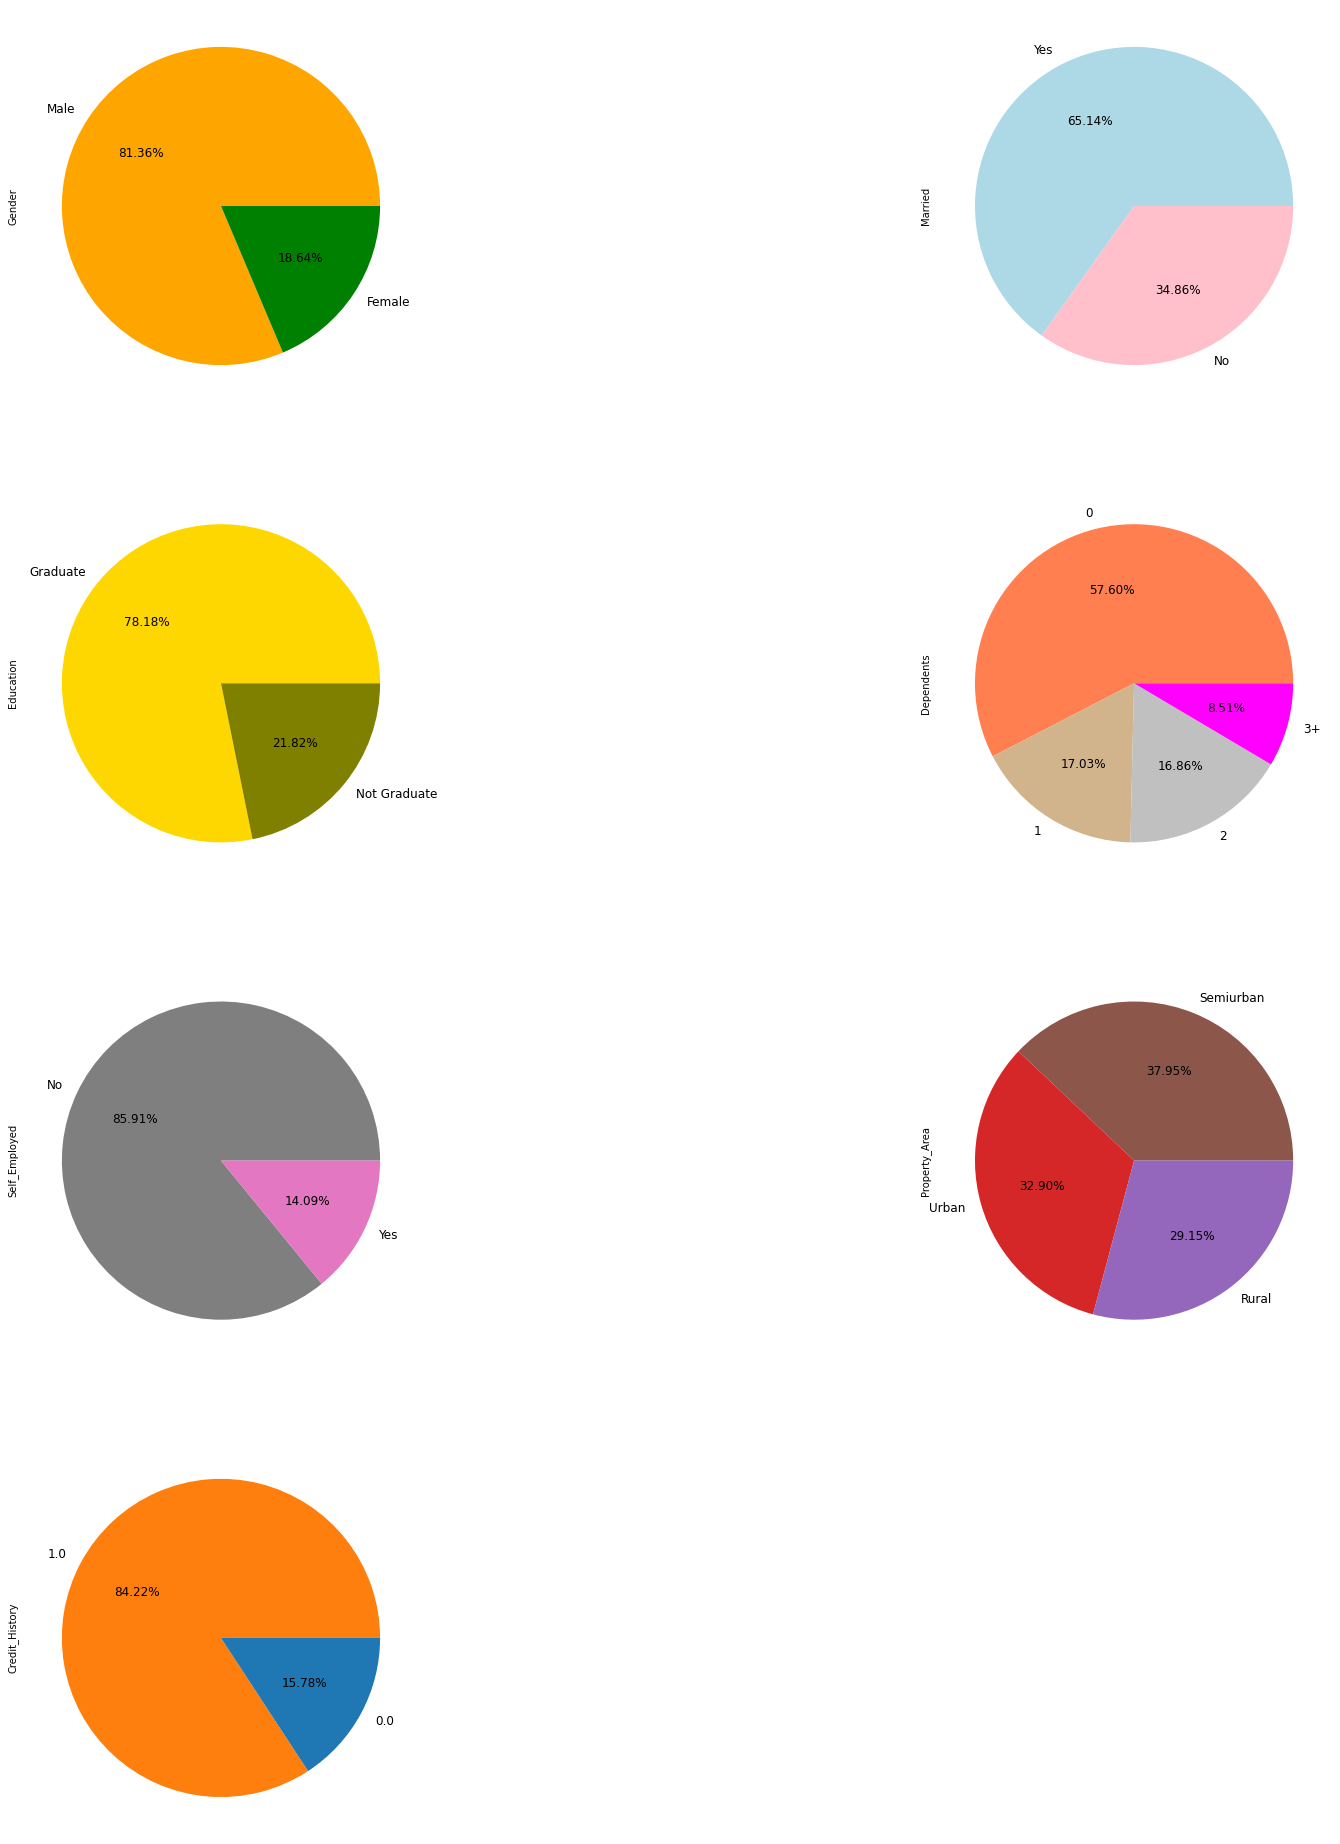

In [41]:
plt.subplot(721)
df['Gender'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(30,60),colors = ['orange', 'green'])
plt.subplot(722)
df['Married'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(30,60),colors = ['lightblue', 'pink'])
plt.subplot(723)
df['Education'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(30,60),colors = ['gold', 'olive'])
plt.subplot(724)
df['Dependents'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(30,60),colors = ['coral', 'tan','silver','magenta'])
plt.subplot(725)
df['Self_Employed'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(30,60),colors = ['#7f7f7f','#e377c2'])
plt.subplot(726)
df['Property_Area'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(30,60),colors = ['#8c564b', '#d62728','#9467bd'])
plt.subplot(727)
df['Credit_History'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(30,60),colors = ['#ff7f0e', '#1f77b4'])

*Observation :*<br>*Max no of male has taken loan they are 81% only 18% female has taken loan*<br>*65% loan applicant are married.*
<br>*78% loan applicant are graduate.*<br>*57% loan application have no dependencies*<br>*85% of loan applicant are self employeed.*
<br>*loan applicant have property in rural,urban and semiurban area and semiurban area property are 37%*<br>*84% applicant have credit history*

###### Bivariate Analysis

###### 1.Categorical Vs Numerical

###### Loan Status
            Vs ApplicantIncome
            Vs CoapplicantIncome
            Vs LoanAmount
            Vs Loan Amount Term
            Vs Credit History

Text(0, 0.5, 'Credit_History')

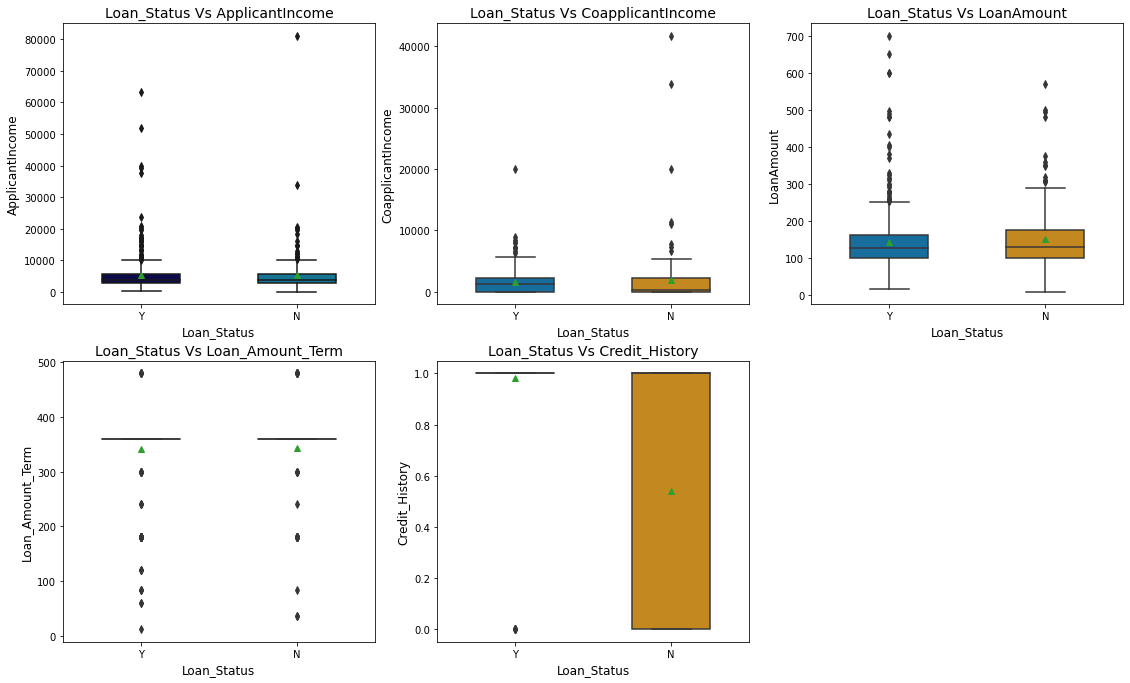

In [42]:
plt.figure(figsize=(19,30))
plt.subplot(5,3,1)
boxplot = sns.boxplot(x ='Loan_Status',y='ApplicantIncome',data=df,showmeans=True,width=0.5,palette="ocean")
plt.title("Loan_Status Vs ApplicantIncome", fontsize=14)
plt.xlabel('Loan_Status', fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.subplot(5,3,2)
boxplot = sns.boxplot(x ='Loan_Status',y='CoapplicantIncome',data=df,showmeans=True,width=0.5,palette="colorblind")
plt.title("Loan_Status Vs CoapplicantIncome", fontsize=14)
plt.xlabel('Loan_Status', fontsize=12)
plt.ylabel('CoapplicantIncome', fontsize=12)
plt.subplot(5,3,3)
boxplot = sns.boxplot(x ='Loan_Status',y='LoanAmount',data=df,showmeans=True,width=0.5,palette="colorblind")
plt.title("Loan_Status Vs LoanAmount", fontsize=14)
plt.xlabel('Loan_Status', fontsize=12)
plt.ylabel('LoanAmount', fontsize=12)
plt.subplot(5,3,4)
boxplot = sns.boxplot(x ='Loan_Status',y='Loan_Amount_Term',data=df,showmeans=True,width=0.5,palette="colorblind")
plt.title("Loan_Status Vs Loan_Amount_Term", fontsize=14)
plt.xlabel('Loan_Status', fontsize=12)
plt.ylabel('Loan_Amount_Term', fontsize=12)
plt.subplot(5,3,5)
boxplot = sns.boxplot(x ='Loan_Status',y='Credit_History',data=df,showmeans=True,width=0.5,palette="colorblind")
plt.title("Loan_Status Vs Credit_History", fontsize=14)
plt.xlabel('Loan_Status', fontsize=12)
plt.ylabel('Credit_History', fontsize=12)

*Observation :*<br>*ApplicantIncome have approx same count of Loan Status*
<br>*cpapplicantIncome have loan_status count yes more than Loan_Status NO*
<br>*LoanAmount which is less have more approval than large Loan Amount*
<br*Loan_Amount_Term is same with both the approved and rejected Loan Status*
<br>*All Loan_Status are No with Credit_History*

###### 2.Both Categorical

###### Loan_Status
            Vs Gender
            Vs Married
            Vs Departments
            Vs Education
            Vs Self_Employed
            Vs Property_Area

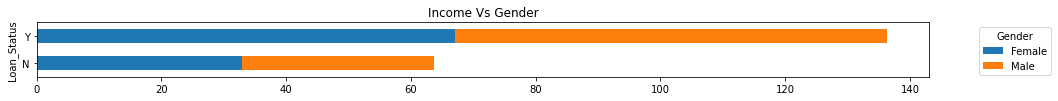

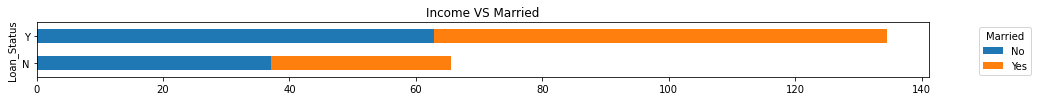

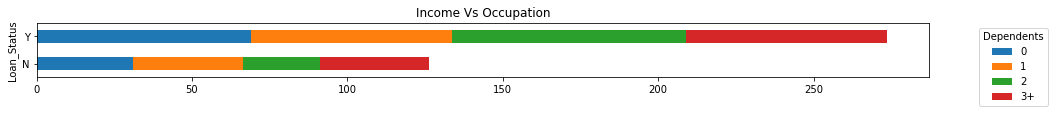

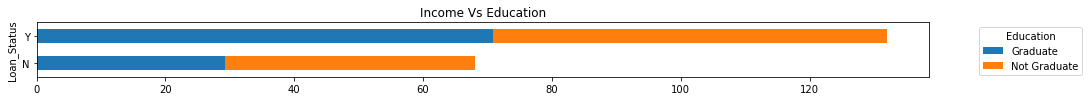

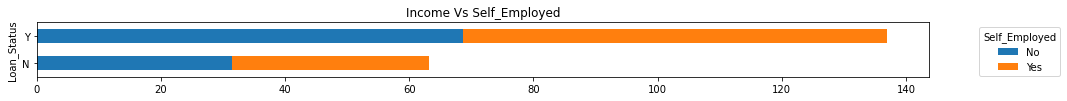

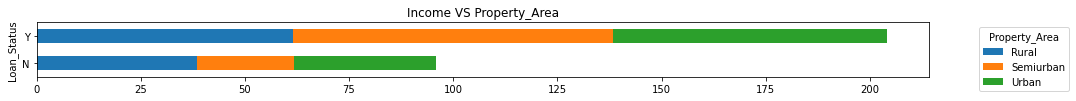

In [43]:
temp=pd.crosstab(df['Loan_Status'],df['Gender'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Gender', mark_right = True,figsize=(16,1))
plt.legend(title = 'Gender',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Loan_Status'],df['Married'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income VS Married', mark_right = True,figsize=(16,1))
plt.legend(title = 'Married',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Loan_Status'],df['Dependents'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Occupation', mark_right = True,figsize=(16,1))
plt.legend(title = 'Dependents',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Loan_Status'],df['Education'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Education', mark_right = True,figsize=(16,1))
plt.legend(title = 'Education',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Loan_Status'],df['Self_Employed'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Self_Employed', mark_right = True,figsize=(16,1))
plt.legend(title = 'Self_Employed',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Loan_Status'],df['Property_Area'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income VS Property_Area', mark_right = True,figsize=(16,1))
plt.legend(title = 'Property_Area',bbox_to_anchor=(1.05, 1), loc='upper left')

*Observation :*<br>*Male have more Loan_Status Yes than Female*
<br>*Married have more Loan than unmarried*
<br>*Dependents with 2 have more loan than others*
<br>*Not graduate have more Loan status Yes*
<br>*Self_Employed have more Loan*
<br>*Semiurban have less rejected loan status*

###### 3.Numerical Vs Numerical

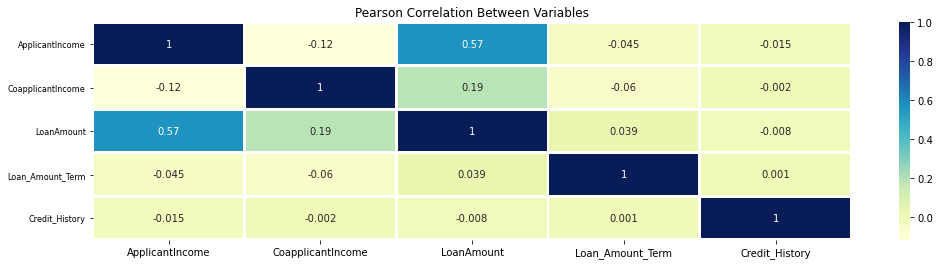

In [44]:
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(17,4)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=1.9)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()   

###### Handling Outliers

In [45]:
fout =['ApplicantIncome','CoapplicantIncome','LoanAmount']
for f in fout:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df.loc[df[f]<lolimit,f] = lolimit
    df.loc[df[f]>uplimit,f] = uplimit

In [46]:
#Recheck for Outliers After Removing

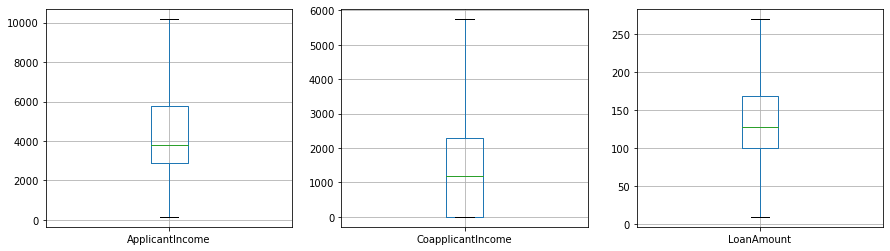

In [47]:
fig, pltcan=plt.subplots(nrows=1, ncols=len(fout), figsize=(15,4))
for predcol , i in zip(fout, range(len(fout))):
    df.boxplot(column=predcol, figsize=(2,10), ax=pltcan[i])
   
   

*Observation :*<br>*All Outliers removed*

###### Handling Missing/Zeros Values

In [48]:
#nan values before removing

In [49]:
for feature in df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status','Credit_History','Loan_Amount_Term']]:
    print(feature," : ", df[feature].unique())

Gender  :  ['Male' 'Female' nan]
Married  :  ['No' 'Yes' nan]
Dependents  :  ['0' '1' '2' '3+' nan]
Education  :  ['Graduate' 'Not Graduate']
Self_Employed  :  ['No' 'Yes' nan]
Property_Area  :  ['Urban' 'Rural' 'Semiurban']
Loan_Status  :  ['Y' 'N']
Credit_History  :  [ 1.  0. nan]
Loan_Amount_Term  :  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


In [50]:
df.isnull().sum().sum()

149

In [51]:
#Removing nan values in Credit

In [52]:
df.Credit_History.median()
df['Credit_History'] = df['Credit_History'].replace(np.nan,1.0)

In [53]:
#removing null values

In [54]:
df=df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [55]:
#Recheck for nan/missing values

In [56]:
df.isnull().sum().sum()

0

In [57]:
df.shape

(523, 13)

*Observation :*<br>*All missing values and Zeros are removed*

###### Encoding Categorical Variables

In [58]:
#Unique values before Encoding

In [59]:
for feature in df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]:
    print(feature," : ", df[feature].unique())

Gender  :  ['Male' 'Female']
Married  :  ['Yes' 'No']
Dependents  :  ['1' '0' '2' '3+']
Education  :  ['Graduate' 'Not Graduate']
Self_Employed  :  ['No' 'Yes']
Property_Area  :  ['Rural' 'Urban' 'Semiurban']
Loan_Status  :  ['N' 'Y']


In [60]:
#Encoding categorical Variable

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

#Recheck Encoded Column Unique Values 

In [62]:
for feature in df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]:
    print(feature," : ", df[feature].unique())

Gender  :  [1 0]
Married  :  [1 0]
Dependents  :  [1 0 2 3]
Education  :  [0 1]
Self_Employed  :  [0 1]
Property_Area  :  [0 2 1]
Loan_Status  :  [0 1]


*Observation :*<br>*Ctegorical fetures are converted into numerical*

###### Handling Cardinality

In [63]:
#droping Loan_ID column

In [64]:
df.drop('Loan_ID',inplace=True,axis=1)

In [65]:
#Recheck Cardinality

Text(0.5, 1.0, 'Cardinality')

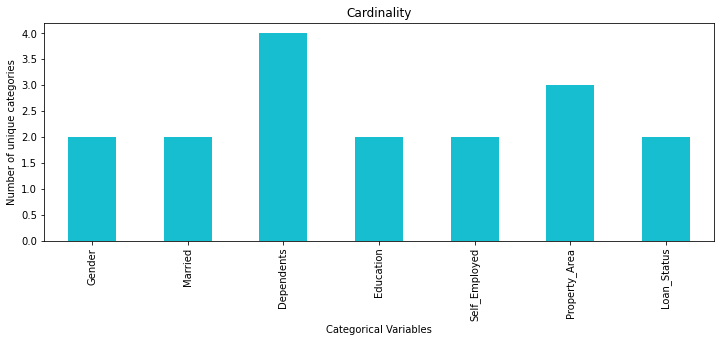

In [66]:
categorical_feature=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
df[categorical_feature].nunique().plot.bar(figsize=(12,4),color='#17becf')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

*Observation :*<br>*Cardinality is removed in categorical features*

###### Handling Skewness

In [67]:
#Skweness before removing

In [68]:
print(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].skew())
#df.skew().plot(kind='barh',color='#9467bd')

ApplicantIncome      1.033473
CoapplicantIncome    1.025487
LoanAmount           0.688285
Loan_Amount_Term    -2.431222
dtype: float64


In [69]:
#Removing Skweness

In [70]:
df[['ApplicantIncome']]= np.sqrt(df[['ApplicantIncome']])
df[['CoapplicantIncome']]= np.sqrt(df[['CoapplicantIncome']])
df[['LoanAmount']]= np.sqrt(df[['LoanAmount']])
#df[['Loan_Amount_Term']]= np.sqrt(df[['Loan_Amount_Term']])


In [71]:
#Recheck for Skewness

In [72]:
print(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].skew())
#df.skew().plot(kind='barh',color='#9467bd')

ApplicantIncome      0.590590
CoapplicantIncome    0.204997
LoanAmount           0.076574
Loan_Amount_Term    -2.431222
dtype: float64


In [73]:
df.shape

(523, 12)

In [74]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1
5,1,1,2,0,1,73.600272,64.776539,16.340135,360.0,1.0,2,1


*Observation :*<br>*Skweness is removed*

###### Feature Selection

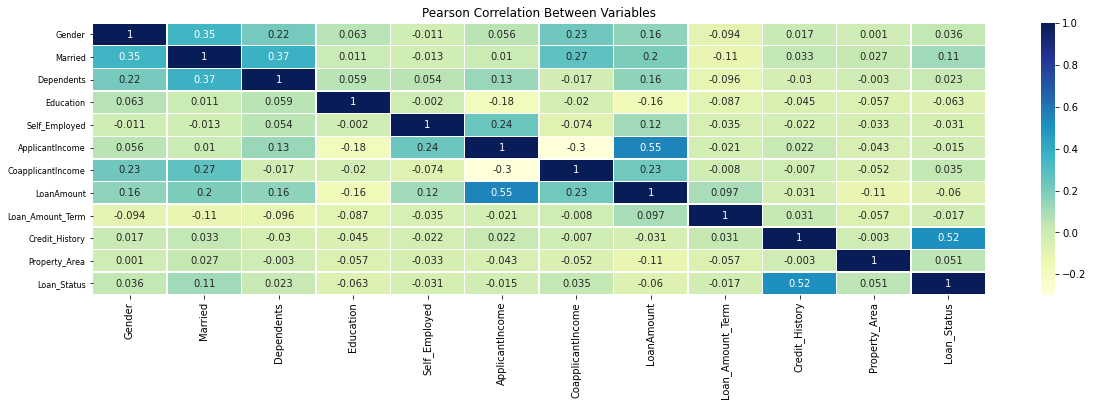

In [75]:
# Variable Correlation
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(20,5)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()        
    

###### split target and feature variables

In [76]:
y_train=df[['Loan_Status']]
X_train=df.drop(['Loan_Status'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (523, 1)
X_train : (523, 11)


*Observation :*<br>*target and prediction features are seprated*

[0.02515783 0.02504873 0.06622624 0.02233918 0.02730534 0.185288
 0.09709111 0.18113288 0.05553835 0.25642376 0.05844858]


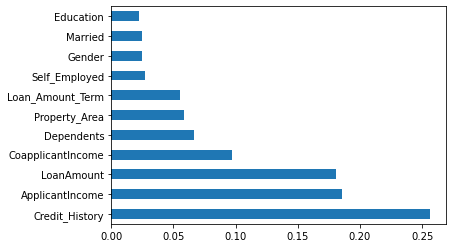

In [77]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [78]:
#droping features

In [79]:
X_train.drop(['Education','Self_Employed','Married','Loan_Amount_Term'],inplace=True,axis=1)

In [80]:
X_train.shape

(523, 7)

In [81]:
#selected features

In [82]:
X_train.columns

Index(['Gender', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Credit_History', 'Property_Area'],
      dtype='object')

In [83]:
y_train.columns

Index(['Loan_Status'], dtype='object')

###### Target Variable is Unbalanced

<AxesSubplot:ylabel='None'>

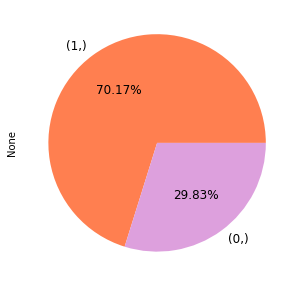

In [88]:
y_train.value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colors = ['coral','plum'])

In [89]:
#Balance the target variable

In [90]:
  
# define dataset
X_train, y_train = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_train)
  
# print the features and the labels
print('x_smote:\n', x_smote.shape)
print('y_smote:\n', y_smote.shape)

x_smote:
 (19800, 20)
y_smote:
 (19800,)


###### Normilization of data

In [93]:
from sklearn.preprocessing import power_transform
X=power_transform(x_smote,method='yeo-johnson')
X

array([[ 9.59236163e-01, -1.07238066e+00, -7.51095682e-02, ...,
         4.72046377e-01, -2.17771257e+00, -4.32779457e-01],
       [ 8.04408148e-01, -6.36477052e-01,  4.88416220e-03, ...,
        -6.36655733e-01, -2.38337507e-02, -2.05545084e+00],
       [-8.50355970e-01, -7.14706253e-03,  2.56519165e-01, ...,
        -3.29410394e-01,  1.35859370e+00, -1.11808894e-01],
       ...,
       [-4.62558981e-01,  4.99122872e-01,  1.72283940e-03, ...,
        -5.07535468e-01,  6.10778780e-02, -9.44951004e-01],
       [ 3.49181492e-01,  9.75459439e-01,  7.80245242e-02, ...,
         7.41621609e-01,  4.59720264e-01, -1.15859180e+00],
       [ 1.50774338e-01,  8.42394312e-01,  5.29017417e-01, ...,
         2.45190867e-01, -1.41511490e+00, -6.35542875e-01]])

###### Splitting Dataset into train and test set

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.25, random_state = 44)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14850, 20)
(14850,)
(4950, 20)
(4950,)


###### Sandardization of data

In [95]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[ 2.29475058 -0.09229304  0.41067846 ... -1.47506761 -1.1033039
   0.50429406]
 [-0.30632985  0.72679326 -1.23279898 ...  1.56173128  1.26612685
   0.51136751]
 [-0.69765636  1.09162773  0.11730119 ... -0.46566493 -0.80684211
   1.61425602]
 ...
 [-0.80810944 -0.02911741 -0.42848104 ... -1.28652842  0.50581691
  -0.63385748]
 [-1.70943917  1.77479135 -3.21059765 ...  0.94170273 -0.88188091
  -0.39205321]
 [-0.63105442  0.0078067   1.23737054 ... -0.36571797  1.44027263
  -0.90844526]]
[[ 7.26623620e-01  2.88419548e-01 -4.13368809e-01 ... -3.26859070e-01
   1.67821602e+00  4.79444486e-01]
 [ 3.33242425e-01 -9.83170564e-01  8.11191091e-01 ...  9.79180029e-01
  -3.36246757e-01  1.00922224e-03]
 [ 5.36974417e-01 -8.42420391e-01 -2.31052025e-02 ...  1.02232909e+00
  -1.22221681e+00 -7.24458522e-02]
 ...
 [-9.14450376e-01  1.17245642e-01 -4.55133134e-01 ... -9.34278070e-01
   2.15606975e-01 -5.27922049e-03]
 [ 2.72762102e-01 -5.26773140e-01 -1.08717006e+00 ...  1.27717763e-01
   3.68008805e

###### Model Building

In [98]:
models=[]
models1 = []
models2=[]

Z = [DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,
    RandomForestClassifier() , GradientBoostingClassifier(),AdaBoostClassifier()] #,SVC(probability=True) ]
X = ["DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier","AdaBoostClassifier"]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    models.append(accuracy_score(pred , y_test))
    models1.append(model.score(x_train , y_train))


In [99]:
d = {"Training Accuracy":models1,"Testing Accuracy" : models}
data_frame = pd.DataFrame(d,index=X)
data_frame

,Training Accuracy,Testing Accuracy
DecisionTreeClassifier,1.000000,0.990101
LogisticRegression,0.957710,0.958990
KNeighborsClassifier,0.983973,0.978182
RandomForestClassifier,1.000000,0.996364
GradientBoostingClassifier,0.994209,0.989899
AdaBoostClassifier,0.993333,0.990505


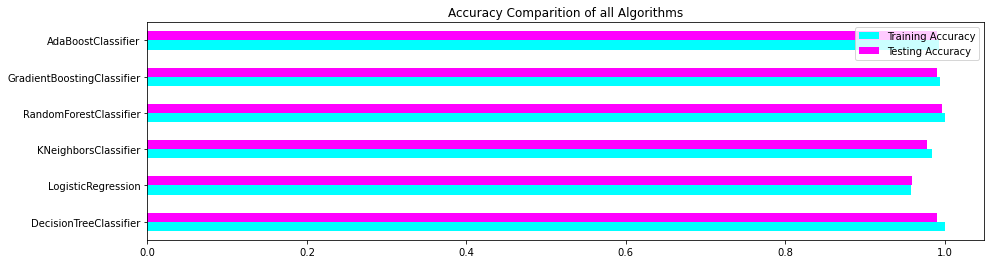

In [100]:
data_frame.plot(kind='barh',figsize=(15,4),title='Accuracy Comparition of all Algorithms',colormap='cool')
plt.show()

###### Evaluation

In [101]:
#Classification Report

In [102]:
models2=[]
models3=[]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    Class_Report=metrics.classification_report(y_test, pred)
    models2.append(Class_Report)
    print("Model Name :",model,"\n",Class_Report)
    f1sc=metrics.f1_score(y_test, pred, average='weighted')
    models3.append(f1sc)
    print("Testing Accuracy of Data with Model",model,":",round(f1sc,2),"\n")

Model Name : DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2471
           1       0.99      1.00      0.99      2479

    accuracy                           0.99      4950
   macro avg       0.99      0.99      0.99      4950
weighted avg       0.99      0.99      0.99      4950

Testing Accuracy of Data with Model DecisionTreeClassifier() : 0.99 

Model Name : LogisticRegression() 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      2471
           1       0.95      0.97      0.96      2479

    accuracy                           0.96      4950
   macro avg       0.96      0.96      0.96      4950
weighted avg       0.96      0.96      0.96      4950

Testing Accuracy of Data with Model LogisticRegression() : 0.96 

Model Name : KNeighborsClassifier() 
               precision    recall  f1-score   support

           0       1.00      0.96      0.

In [103]:
d2 = {"Accuracy of Testing Data" : models3}
data_frame2 = pd.DataFrame(d2,index=X)
data_frame2

,Accuracy of Testing Data
DecisionTreeClassifier,0.992121
LogisticRegression,0.958982
KNeighborsClassifier,0.978171
RandomForestClassifier,0.995960
GradientBoostingClassifier,0.989898
AdaBoostClassifier,0.990504


In [104]:
# Confusion Matrix

In [105]:
cmodel=[]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    cm = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    cmodel.append(cm)
dc={"Confusion Matrix":cmodel}    
conf_mat=pd.DataFrame(dc,index=X)
conf_mat

,Confusion Matrix
DecisionTreeClassifier,"[[2467, 12], [28, 2443]]"
LogisticRegression,"[[2409, 70], [133, 2338]]"
KNeighborsClassifier,"[[2479, 0], [108, 2363]]"
RandomForestClassifier,"[[2477, 2], [15, 2456]]"
GradientBoostingClassifier,"[[2478, 1], [49, 2422]]"
AdaBoostClassifier,"[[2473, 6], [41, 2430]]"


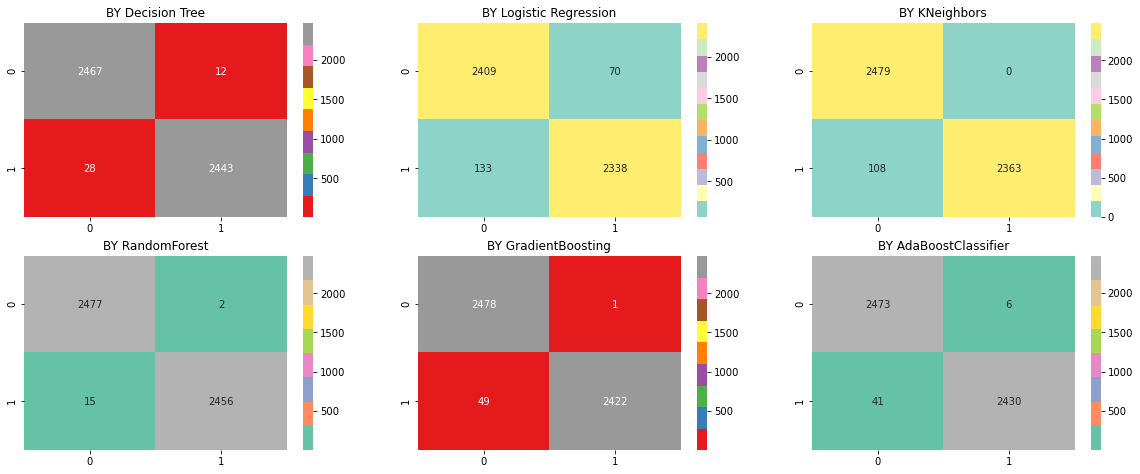

In [107]:
plt.figure(figsize=(20,25))
#plt.subplot(7,3,1)
#sns.heatmap(cmodel[0],annot=True,fmt='g',cmap='Set2')
#plt.title("BY SVC")
plt.subplot(6,3,1)
sns.heatmap(cmodel[0],annot=True,fmt='g',cmap='Set1')
plt.title("BY Decision Tree")
plt.subplot(6,3,2)
sns.heatmap(cmodel[1],annot=True,fmt='g',cmap='Set3')
plt.title("BY Logistic Regression")
plt.subplot(6,3,3)
sns.heatmap(cmodel[2],annot=True,fmt='g',cmap='Set3')
plt.title("BY KNeighbors")  
plt.subplot(6,3,4)
sns.heatmap(cmodel[3],annot=True,fmt='g',cmap='Set2')
plt.title("BY RandomForest")
plt.subplot(6,3,5)
sns.heatmap(cmodel[4],annot=True,fmt='g',cmap='Set1')
plt.title("BY GradientBoosting")
plt.subplot(6,3,6)
sns.heatmap(cmodel[5],annot=True,fmt='g',cmap='Set2')
plt.title("BY AdaBoostClassifier")
plt.show()   


###### Validation

In [108]:
#Cross validation

In [109]:
vmodel=[]
acvalmodel=[]
for i in range(0,len(Z)):
    model = Z[i]
    model.fit( x_train , y_train )
    pred = model.predict(x_test)
    acval=cross_val_score(model,x_train , y_train, cv=10, scoring='f1_weighted')
    acvalmodel.append(acval)
    print('\n',model,' 10-fold Cross Validation:')
    print('Accuracy value :',acval)
    vmodel.append(round(acval.mean(),2))
    print('Final Average Accuracy :',round(acval.mean(),3))


 DecisionTreeClassifier()  10-fold Cross Validation:
Accuracy value : [0.99595957 0.9898988  0.99259255 0.99124551 0.99461278 0.99528615
 0.98922494 0.99124577 0.99191899 0.99326587]
Final Average Accuracy : 0.993

 LogisticRegression()  10-fold Cross Validation:
Accuracy value : [0.96363617 0.96228012 0.95688965 0.95824745 0.9602632  0.9582481
 0.9454251  0.94814175 0.96026835 0.95555241]
Final Average Accuracy : 0.957

 KNeighborsClassifier()  10-fold Cross Validation:
Accuracy value : [0.98248642 0.98181239 0.97439445 0.97506912 0.96764367 0.97776713
 0.96831911 0.97102004 0.97844148 0.9764175 ]
Final Average Accuracy : 0.975

 RandomForestClassifier()  10-fold Cross Validation:
Accuracy value : [0.9986532  0.99595954 0.99595957 0.99528611 0.9939392  0.9986532
 0.99528611 0.99595954 0.99663297 0.99595952]
Final Average Accuracy : 0.996

 GradientBoostingClassifier()  10-fold Cross Validation:
Accuracy value : [0.99595954 0.99124535 0.99259253 0.98922494 0.98855078 0.99124517
 0.983

In [110]:
dv={"10 fold Cross Validation":acvalmodel,"Final Average Accuracy":vmodel}    
cross_val=pd.DataFrame(dv,index=X)
cross_val

,10 fold Cross Validation,Final Average Accuracy
DecisionTreeClassifier,"[0.9959595739731563, 0.9898987975152876, 0.992...",0.99
LogisticRegression,"[0.9636361657584067, 0.9622801205517372, 0.956...",0.96
KNeighborsClassifier,"[0.982486420343628, 0.9818123921367713, 0.9743...",0.98
RandomForestClassifier,"[0.9986531974317343, 0.9959595409930979, 0.995...",1.00
GradientBoostingClassifier,"[0.9959595409930979, 0.9912453545526502, 0.992...",0.99
AdaBoostClassifier,"[0.9919188621118291, 0.9912456245132493, 0.995...",0.99


In [111]:
#visualization of final Accuracy

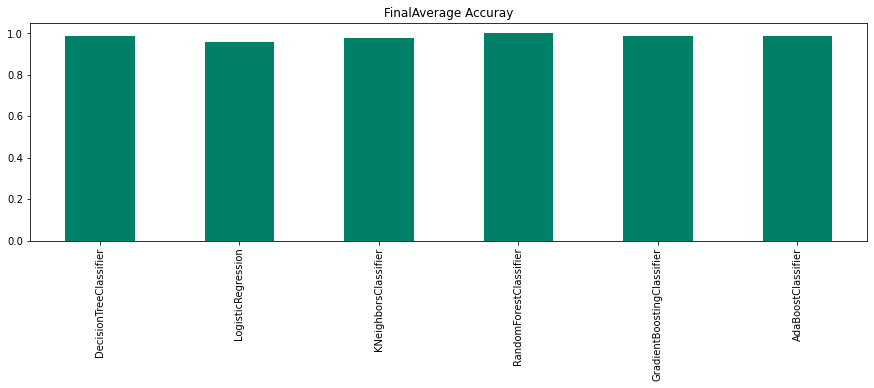

In [112]:
#cross_val['Final Average Accuracy'].plot(kind='bar')
cross_val['Final Average Accuracy'].plot(kind='bar',figsize=(15,4),title='FinalAverage Accuray',colormap='summer')
plt.show()

In [113]:
#AUC_ROC Curve

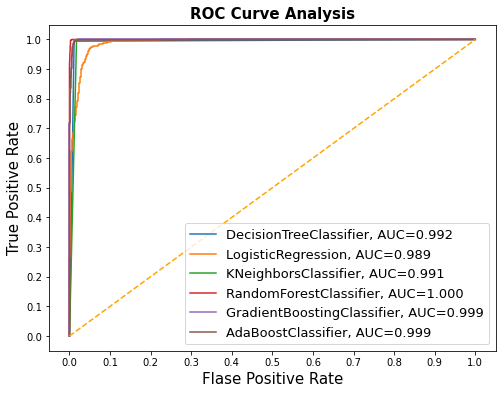

In [114]:
result_table = pd.DataFrame(columns=['Z', 'fpr','tpr','auc'])
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    ypred = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  ypred)
    auc = roc_auc_score(y_test, ypred)
    result_table = result_table.append({'model':model.__class__.__name__,'fpr':fpr,'tpr':tpr,'auc':auc},ignore_index=True)
result_table.set_index('model', inplace=True)

fig = plt.figure(figsize=(8,6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],result_table.loc[i]['tpr'],label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

###### Model Comparision

In [115]:
dfcomp=pd.concat([data_frame,cross_val],axis=1)
dfcomp[['Training Accuracy','Testing Accuracy','Final Average Accuracy']].head(6)

,Training Accuracy,Testing Accuracy,Final Average Accuracy
DecisionTreeClassifier,1.000000,0.990101,0.99
LogisticRegression,0.957710,0.958990,0.96
KNeighborsClassifier,0.983973,0.978182,0.98
RandomForestClassifier,1.000000,0.996364,1.00
GradientBoostingClassifier,0.994209,0.989899,0.99
AdaBoostClassifier,0.993333,0.990505,0.99


<AxesSubplot:title={'center':'Accuracy Comparision'}>

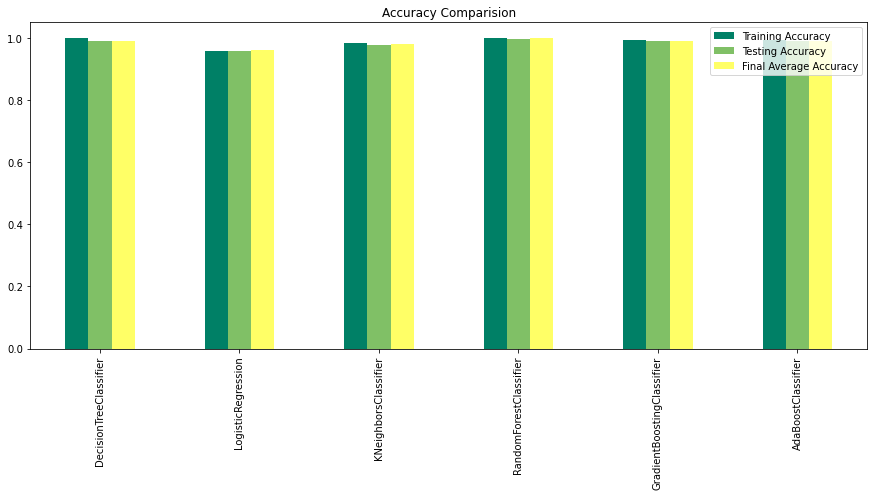

In [116]:
dfcomp[['Training Accuracy','Testing Accuracy','Final Average Accuracy']].plot(kind='bar',figsize=(15,6),title='Accuracy Comparision',colormap='summer')

###### Hyperparameter Tuning 

In [117]:
#for Decision Tree Model

In [119]:
criterion = ['gini', 'entropy']
splitter=['best','random']
max_depth = [2,4,6,8,10,12]
min_samples_split=[1,5,3,1.5,3.9,10,15]
min_weight_fraction_leaf=[1.4,3.5,2.6,9.3,1.2,0.5]
max_features=['auto','sqrt','log2']
ccp_alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
max_leaf_nodes=[4,6,12,10,25,50]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]


param_distributions = dict(criterion = criterion,
                           splitter=splitter,
                           max_depth=max_depth,
                           min_samples_split=min_samples_split,
                           min_weight_fraction_leaf=min_weight_fraction_leaf,
                           max_features=max_features,
                           ccp_alpha=ccp_alpha,
                           max_leaf_nodes=max_leaf_nodes,
                           class_weight=class_weight)                      

random = RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.7545468018818028
Best Params:  {'splitter': 'best', 'min_weight_fraction_leaf': 0.5, 'min_samples_split': 5, 'max_leaf_nodes': 50, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini', 'class_weight': {1: 0.5, 0: 0.5}, 'ccp_alpha': 0.1}


In [ ]:
# for Random Forest

In [120]:
n_estimators=[10, 50,5,90, 200, 110, 500, 1000]
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
min_samples_split=[1,5,3,1.5,3.9,10,15]
min_samples_leaf=[1.4,3,2.6,9.3,1.2,0.5,2,6,10]
min_weight_fraction_leaf=[1.4,3.5,2.6,9.3,1.2,0.5]
max_features=['auto','sqrt','log2']
max_leaf_nodes=[4,6,12,10,25,50]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
verbose = [1,5,4,10,30,15,20,100]
random_state= [1,5,10, 100,200,500]
n_jobs= [1,5,10, 100,200,500]

param_distributions = dict(n_estimators=n_estimators,
                           criterion = criterion,
                           max_depth = max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           min_weight_fraction_leaf=min_weight_fraction_leaf,
                           max_features=max_features,
                           max_leaf_nodes=max_leaf_nodes,
                           class_weight = class_weight,
                           verbose = verbose,
                           random_state= random_state,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=RandomForestClassifier(),
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
building tree 1 of 1000building tree 2 of 1000

building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000building tree 6 of 1000

building tree 7 of 1000
building tree 8 of 1000building tree 9 of 1000

building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   3 tasks      | elapsed:    0.0s
building tree 14 of 1000[Parallel(n_jobs=10)]: Done   4 tasks      | elapsed:    0.0s

building tree 15 of 1000building tree 16 of 1000
building tree 17 of 1000

building tree 18 of 1000[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.0s

[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   7 tasks   


building tree 118 of 1000[Parallel(n_jobs=10)]: Done 106 tasks      | elapsed:    0.7s

[Parallel(n_jobs=10)]: Done 107 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:    0.7s
building tree 119 of 1000[Parallel(n_jobs=10)]: Done 109 tasks      | elapsed:    0.7s

building tree 120 of 1000[Parallel(n_jobs=10)]: Done 110 tasks      | elapsed:    0.7s

building tree 121 of 1000building tree 122 of 1000[Parallel(n_jobs=10)]: Done 111 tasks      | elapsed:    0.7s

building tree 123 of 1000[Parallel(n_jobs=10)]: Done 112 tasks      | elapsed:    0.7s

[Parallel(n_jobs=10)]: Done 113 tasks      | elapsed:    0.7s

building tree 124 of 1000
[Parallel(n_jobs=10)]: Done 114 tasks      | elapsed:    0.7s
building tree 125 of 1000[Parallel(n_jobs=10)]: Done 115 tasks      | elapsed:    0.7s

building tree 126 of 1000
[Parallel(n_jobs=10)]: Done 116 tasks      | elapsed:    0.7s
building tree 127 of 1000
[Parallel(n_jobs=10)]: Done 117 tasks      | elapsed:    

building tree 215 of 1000[Parallel(n_jobs=10)]: Done 204 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 205 tasks      | elapsed:    1.2s

building tree 216 of 1000building tree 217 of 1000building tree 218 of 1000
building tree 219 of 1000

[Parallel(n_jobs=10)]: Done 206 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done 207 tasks      | elapsed:    1.3s

[Parallel(n_jobs=10)]: Done 208 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done 209 tasks      | elapsed:    1.3s
building tree 220 of 1000
[Parallel(n_jobs=10)]: Done 210 tasks      | elapsed:    1.3s
building tree 221 of 1000building tree 222 of 1000building tree 223 of 1000


[Parallel(n_jobs=10)]: Done 211 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done 212 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done 213 tasks      | elapsed:    1.3s
building tree 224 of 1000[Parallel(n_jobs=10)]: Done 214 tasks      | elapsed:    1.3s

building tree 225 of 1000[Parallel(n_jobs=10)]: Done 215 t


building tree 310 of 1000building tree 311 of 1000building tree 312 of 1000
building tree 313 of 1000[Parallel(n_jobs=10)]: Done 300 tasks      | elapsed:    1.8s


building tree 314 of 1000
[Parallel(n_jobs=10)]: Done 301 tasks      | elapsed:    1.8s

[Parallel(n_jobs=10)]: Done 302 tasks      | elapsed:    1.8s
[Parallel(n_jobs=10)]: Done 303 tasks      | elapsed:    1.8s
[Parallel(n_jobs=10)]: Done 304 tasks      | elapsed:    1.8s
building tree 315 of 1000[Parallel(n_jobs=10)]: Done 305 tasks      | elapsed:    1.8s

building tree 316 of 1000[Parallel(n_jobs=10)]: Done 306 tasks      | elapsed:    1.8s

building tree 317 of 1000
[Parallel(n_jobs=10)]: Done 307 tasks      | elapsed:    1.8s
building tree 318 of 1000[Parallel(n_jobs=10)]: Done 308 tasks      | elapsed:    1.9s

building tree 319 of 1000[Parallel(n_jobs=10)]: Done 309 tasks      | elapsed:    1.9s

building tree 320 of 1000building tree 321 of 1000building tree 322 of 1000[Parallel(n_jobs=10)]: Done 310 tasks      |

building tree 404 of 1000[Parallel(n_jobs=10)]: Done 394 tasks      | elapsed:    2.4s

building tree 405 of 1000[Parallel(n_jobs=10)]: Done 395 tasks      | elapsed:    2.4s
building tree 406 of 1000[Parallel(n_jobs=10)]: Done 396 tasks      | elapsed:    2.4s


building tree 407 of 1000[Parallel(n_jobs=10)]: Done 397 tasks      | elapsed:    2.4s

building tree 408 of 1000building tree 409 of 1000[Parallel(n_jobs=10)]: Done 398 tasks      | elapsed:    2.4s
[Parallel(n_jobs=10)]: Done 399 tasks      | elapsed:    2.4s


building tree 410 of 1000
building tree 411 of 1000[Parallel(n_jobs=10)]: Done 400 tasks      | elapsed:    2.4s

[Parallel(n_jobs=10)]: Done 401 tasks      | elapsed:    2.4s
building tree 412 of 1000[Parallel(n_jobs=10)]: Done 402 tasks      | elapsed:    2.4s

building tree 413 of 1000[Parallel(n_jobs=10)]: Done 403 tasks      | elapsed:    2.5s

building tree 414 of 1000[Parallel(n_jobs=10)]: Done 404 tasks      | elapsed:    2.5s
building tree 415 of 1000
[Parall

[Parallel(n_jobs=10)]: Done 489 tasks      | elapsed:    3.0s
building tree 500 of 1000
[Parallel(n_jobs=10)]: Done 490 tasks      | elapsed:    3.0s
building tree 501 of 1000[Parallel(n_jobs=10)]: Done 491 tasks      | elapsed:    3.0s

building tree 502 of 1000
building tree 503 of 1000
building tree 504 of 1000
[Parallel(n_jobs=10)]: Done 492 tasks      | elapsed:    3.0s
[Parallel(n_jobs=10)]: Done 493 tasks      | elapsed:    3.0s
[Parallel(n_jobs=10)]: Done 494 tasks      | elapsed:    3.0s
building tree 505 of 1000
[Parallel(n_jobs=10)]: Done 495 tasks      | elapsed:    3.0s
building tree 506 of 1000[Parallel(n_jobs=10)]: Done 496 tasks      | elapsed:    3.0s

building tree 507 of 1000
[Parallel(n_jobs=10)]: Done 497 tasks      | elapsed:    3.0s
building tree 508 of 1000
[Parallel(n_jobs=10)]: Done 498 tasks      | elapsed:    3.0s
building tree 509 of 1000[Parallel(n_jobs=10)]: Done 499 tasks      | elapsed:    3.0s

building tree 510 of 1000[Parallel(n_jobs=10)]: Done 500 t

building tree 595 of 1000[Parallel(n_jobs=10)]: Done 585 tasks      | elapsed:    3.5s

building tree 596 of 1000[Parallel(n_jobs=10)]: Done 586 tasks      | elapsed:    3.6s
building tree 597 of 1000building tree 598 of 1000[Parallel(n_jobs=10)]: Done 587 tasks      | elapsed:    3.6s
[Parallel(n_jobs=10)]: Done 588 tasks      | elapsed:    3.6s
building tree 599 of 1000building tree 600 of 1000[Parallel(n_jobs=10)]: Done 589 tasks      | elapsed:    3.6s





[Parallel(n_jobs=10)]: Done 590 tasks      | elapsed:    3.6s
building tree 601 of 1000[Parallel(n_jobs=10)]: Done 591 tasks      | elapsed:    3.6s
building tree 602 of 1000

[Parallel(n_jobs=10)]: Done 592 tasks      | elapsed:    3.6s
building tree 603 of 1000[Parallel(n_jobs=10)]: Done 593 tasks      | elapsed:    3.6s

building tree 604 of 1000[Parallel(n_jobs=10)]: Done 594 tasks      | elapsed:    3.6s

building tree 605 of 1000
[Parallel(n_jobs=10)]: Done 595 tasks      | elapsed:    3.6s
building tree 606 of 1000
buildi

building tree 693 of 1000[Parallel(n_jobs=10)]: Done 683 tasks      | elapsed:    4.1s

building tree 694 of 1000[Parallel(n_jobs=10)]: Done 684 tasks      | elapsed:    4.1s

building tree 695 of 1000[Parallel(n_jobs=10)]: Done 685 tasks      | elapsed:    4.1s

building tree 696 of 1000
[Parallel(n_jobs=10)]: Done 686 tasks      | elapsed:    4.1s

building tree 697 of 1000[Parallel(n_jobs=10)]: Done 687 tasks      | elapsed:    4.1s

building tree 698 of 1000[Parallel(n_jobs=10)]: Done 688 tasks      | elapsed:    4.2s
building tree 699 of 1000
building tree 700 of 1000[Parallel(n_jobs=10)]: Done 689 tasks      | elapsed:    4.2s

[Parallel(n_jobs=10)]: Done 690 tasks      | elapsed:    4.2s

building tree 701 of 1000building tree 702 of 1000[Parallel(n_jobs=10)]: Done 691 tasks      | elapsed:    4.2s
[Parallel(n_jobs=10)]: Done 692 tasks      | elapsed:    4.2s

building tree 703 of 1000[Parallel(n_jobs=10)]: Done 693 tasks      | elapsed:    4.2s


building tree 704 of 1000
[Para

building tree 817 of 1000building tree 818 of 1000
[Parallel(n_jobs=10)]: Done 807 tasks      | elapsed:    4.9s
[Parallel(n_jobs=10)]: Done 808 tasks      | elapsed:    4.9s

building tree 819 of 1000building tree 820 of 1000

[Parallel(n_jobs=10)]: Done 809 tasks      | elapsed:    4.9s
[Parallel(n_jobs=10)]: Done 810 tasks      | elapsed:    4.9s
building tree 821 of 1000[Parallel(n_jobs=10)]: Done 811 tasks      | elapsed:    4.9s

building tree 822 of 1000
building tree 823 of 1000
[Parallel(n_jobs=10)]: Done 812 tasks      | elapsed:    4.9s
[Parallel(n_jobs=10)]: Done 813 tasks      | elapsed:    4.9s
building tree 824 of 1000building tree 825 of 1000[Parallel(n_jobs=10)]: Done 814 tasks      | elapsed:    4.9s

[Parallel(n_jobs=10)]: Done 815 tasks      | elapsed:    4.9s
building tree 826 of 1000
[Parallel(n_jobs=10)]: Done 816 tasks      | elapsed:    4.9s

building tree 827 of 1000building tree 828 of 1000[Parallel(n_jobs=10)]: Done 817 tasks      | elapsed:    4.9s


[Paral

building tree 914 of 1000building tree 915 of 1000building tree 916 of 1000[Parallel(n_jobs=10)]: Done 904 tasks      | elapsed:    5.4s

building tree 917 of 1000

[Parallel(n_jobs=10)]: Done 905 tasks      | elapsed:    5.4s

building tree 918 of 1000building tree 919 of 1000[Parallel(n_jobs=10)]: Done 906 tasks      | elapsed:    5.5s


[Parallel(n_jobs=10)]: Done 907 tasks      | elapsed:    5.5s
[Parallel(n_jobs=10)]: Done 908 tasks      | elapsed:    5.5s
[Parallel(n_jobs=10)]: Done 909 tasks      | elapsed:    5.5s
building tree 920 of 1000building tree 921 of 1000
building tree 922 of 1000[Parallel(n_jobs=10)]: Done 910 tasks      | elapsed:    5.5s
[Parallel(n_jobs=10)]: Done 911 tasks      | elapsed:    5.5s
[Parallel(n_jobs=10)]: Done 912 tasks      | elapsed:    5.5s


building tree 923 of 1000[Parallel(n_jobs=10)]: Done 913 tasks      | elapsed:    5.5s

building tree 924 of 1000[Parallel(n_jobs=10)]: Done 914 tasks      | elapsed:    5.5s
building tree 925 of 1000
[Parall

###### Final Model

*Choosing the Random Forest as Final Model*
<br>*Random Forest Test Accuray and Train Accuracy are approx equal*<br>
*and its final Accuracy is also higher than test Accuracy and equal to train Accuracy*
<br>*final Accuracy is also higher than other models*
<br>*Best Score after Hyperparameter tuning is also high*

###### Retraining the Model

In [121]:
#Full Dataset

In [122]:
y_train=df[['Loan_Status']]
X_train=df.drop(['Loan_Status'],axis=1)


In [123]:
PScaler=StandardScaler()
PScalerFit=PScaler.fit(X_train)

x_train=PScalerFit.transform(X_train)

print("x_train :",x_train.shape)
print("y_train :",y_train.shape)


x_train : (523, 11)
y_train : (523, 1)


In [124]:
clf =RandomForestClassifier(verbose=100,random_state=500,n_jobs=10,n_estimators=1000,min_weight_fraction_leaf=0.5,min_samples_split=5,min_samples_leaf=3,max_leaf_nodes=12,max_features='auto',max_depth=2,criterion='entropy',class_weight={1: 0.5, 0: 0.5})

finalRF=clf.fit(x_train,y_train)
print("Accuracy :", finalRF.score(x_train, y_train))

paccval=cross_val_score(finalRF, x_train , y_train, cv=5, scoring='f1_weighted')
print('\n\nCross Validation')
print('Accuracy values:',paccval)

print('\nFinal Average Accuracy of the model:', round(paccval.mean(),2))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000building tree 6 of 1000

building tree 7 of 1000[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:    0.0s
building tree 8 of 1000
building tree 9 of 1000
[Parallel(n_jobs=10)]: Done   2 tasks      | elapsed:    0.0s

building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000building tree 14 of 1000

building tree 15 of 1000
building tree 16 of 1000
[Parallel(n_jobs=10)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:    0.0s
building tree 17 of 1000building tree 18 of 1000

[Parallel(n_jobs=10)]: Done   7 tasks      | elapsed:    0.0s
building tree 19 of 1000
building tree 20 o

building tree 123 of 1000building tree 124 of 1000[Parallel(n_jobs=10)]: Done 113 tasks      | elapsed:    0.3s
building tree 125 of 1000

[Parallel(n_jobs=10)]: Done 114 tasks      | elapsed:    0.3s
building tree 126 of 1000[Parallel(n_jobs=10)]: Done 115 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 116 tasks      | elapsed:    0.3s

building tree 127 of 1000
[Parallel(n_jobs=10)]: Done 117 tasks      | elapsed:    0.3s
building tree 128 of 1000building tree 129 of 1000

[Parallel(n_jobs=10)]: Done 118 tasks      | elapsed:    0.3s

[Parallel(n_jobs=10)]: Done 119 tasks      | elapsed:    0.3s
building tree 130 of 1000building tree 131 of 1000building tree 132 of 1000
building tree 133 of 1000
building tree 134 of 1000


[Parallel(n_jobs=10)]: Done 120 tasks      | elapsed:    0.3s
building tree 135 of 1000
[Parallel(n_jobs=10)]: Done 121 tasks      | elapsed:    0.3s
building tree 136 of 1000building tree 137 of 1000[Parallel(n_jobs=10)]: Done 122 tasks      | elapsed: 


building tree 269 of 1000building tree 270 of 1000


[Parallel(n_jobs=10)]: Done 259 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done 260 tasks      | elapsed:    0.7s
building tree 271 of 1000[Parallel(n_jobs=10)]: Done 261 tasks      | elapsed:    0.7s
building tree 272 of 1000
building tree 273 of 1000building tree 274 of 1000
[Parallel(n_jobs=10)]: Done 262 tasks      | elapsed:    0.7s
building tree 275 of 1000
[Parallel(n_jobs=10)]: Done 263 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done 264 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done 265 tasks      | elapsed:    0.7s

building tree 276 of 1000

building tree 277 of 1000[Parallel(n_jobs=10)]: Done 266 tasks      | elapsed:    0.7s

building tree 278 of 1000[Parallel(n_jobs=10)]: Done 267 tasks      | elapsed:    0.7s

[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed:    0.7s
building tree 279 of 1000building tree 280 of 1000

building tree 281 of 1000[Parallel(n_jobs=10)]: Done 269 tasks    


building tree 401 of 1000
building tree 402 of 1000building tree 403 of 1000building tree 404 of 1000
building tree 405 of 1000
building tree 406 of 1000building tree 407 of 1000[Parallel(n_jobs=10)]: Done 391 tasks      | elapsed:    1.1s


building tree 408 of 1000[Parallel(n_jobs=10)]: Done 392 tasks      | elapsed:    1.1s


building tree 409 of 1000[Parallel(n_jobs=10)]: Done 393 tasks      | elapsed:    1.1s

[Parallel(n_jobs=10)]: Done 394 tasks      | elapsed:    1.1s
building tree 410 of 1000
[Parallel(n_jobs=10)]: Done 395 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 396 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 397 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 398 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 399 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 400 tasks      | elapsed:    1.1s
building tree 411 of 1000[Parallel(n_jobs=10)]: Done 401 tasks      | elapsed:    1.1s
building tree 412 of 1000

[Paral

building tree 521 of 1000building tree 522 of 1000
[Parallel(n_jobs=10)]: Done 510 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 511 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 512 tasks      | elapsed:    1.4s
building tree 523 of 1000building tree 524 of 1000[Parallel(n_jobs=10)]: Done 513 tasks      | elapsed:    1.4s

[Parallel(n_jobs=10)]: Done 514 tasks      | elapsed:    1.4s



building tree 525 of 1000
building tree 526 of 1000[Parallel(n_jobs=10)]: Done 515 tasks      | elapsed:    1.4s
building tree 527 of 1000
[Parallel(n_jobs=10)]: Done 516 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 517 tasks      | elapsed:    1.4s

building tree 528 of 1000building tree 529 of 1000
[Parallel(n_jobs=10)]: Done 518 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done 519 tasks      | elapsed:    1.4s

building tree 530 of 1000[Parallel(n_jobs=10)]: Done 520 tasks      | elapsed:    1.4s
building tree 531 of 1000[Parallel(n_jobs=10)]: Done 521 t

building tree 664 of 1000building tree 665 of 1000[Parallel(n_jobs=10)]: Done 651 tasks      | elapsed:    1.8s
[Parallel(n_jobs=10)]: Done 652 tasks      | elapsed:    1.8s
[Parallel(n_jobs=10)]: Done 653 tasks      | elapsed:    1.8s
[Parallel(n_jobs=10)]: Done 654 tasks      | elapsed:    1.8s
[Parallel(n_jobs=10)]: Done 655 tasks      | elapsed:    1.8s


building tree 666 of 1000

building tree 667 of 1000[Parallel(n_jobs=10)]: Done 656 tasks      | elapsed:    1.8s

[Parallel(n_jobs=10)]: Done 657 tasks      | elapsed:    1.8s
building tree 668 of 1000[Parallel(n_jobs=10)]: Done 658 tasks      | elapsed:    1.8s
building tree 669 of 1000[Parallel(n_jobs=10)]: Done 659 tasks      | elapsed:    1.8s


building tree 670 of 1000building tree 671 of 1000
[Parallel(n_jobs=10)]: Done 660 tasks      | elapsed:    1.8s

[Parallel(n_jobs=10)]: Done 661 tasks      | elapsed:    1.8s
building tree 672 of 1000building tree 673 of 1000building tree 674 of 1000


[Parallel(n_jobs=10)]: Done 662

building tree 788 of 1000building tree 789 of 1000

[Parallel(n_jobs=10)]: Done 774 tasks      | elapsed:    2.2s

[Parallel(n_jobs=10)]: Done 775 tasks      | elapsed:    2.2s
building tree 790 of 1000
[Parallel(n_jobs=10)]: Done 776 tasks      | elapsed:    2.2s
building tree 791 of 1000building tree 792 of 1000

building tree 793 of 1000
building tree 794 of 1000building tree 795 of 1000

[Parallel(n_jobs=10)]: Done 777 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 778 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 779 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 781 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 782 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 783 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 784 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 785 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 786 tasks      | el

building tree 931 of 1000
building tree 932 of 1000
building tree 933 of 1000
[Parallel(n_jobs=10)]: Done 920 tasks      | elapsed:    2.6s
building tree 934 of 1000[Parallel(n_jobs=10)]: Done 921 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 922 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 923 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 924 tasks      | elapsed:    2.6s

building tree 935 of 1000[Parallel(n_jobs=10)]: Done 925 tasks      | elapsed:    2.6s

building tree 936 of 1000building tree 937 of 1000
[Parallel(n_jobs=10)]: Done 926 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 927 tasks      | elapsed:    2.6s

building tree 938 of 1000
[Parallel(n_jobs=10)]: Done 928 tasks      | elapsed:    2.6s
building tree 939 of 1000building tree 940 of 1000building tree 941 of 1000
building tree 942 of 1000[Parallel(n_jobs=10)]: Done 929 tasks      | elapsed:    2.6s
[Parallel(n_jobs=10)]: Done 930 tasks      | elapsed:    2.6s
[Parallel

[Parallel(n_jobs=10)]: Done 222 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 223 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 224 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 225 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 226 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 227 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 228 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 229 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 230 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 231 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 232 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 233 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 234 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 235 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 236 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 237 tasks      | elapsed:    0.1s
[Paralle

[Parallel(n_jobs=10)]: Done 560 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 561 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 562 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 563 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 564 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 565 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 566 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 567 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 568 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 569 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 570 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 571 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 572 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 573 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 574 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 575 tasks      | elapsed:    0.2s
[Paralle

[Parallel(n_jobs=10)]: Done 842 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 843 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 844 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 845 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 846 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 847 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 848 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 849 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 850 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 851 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 852 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 853 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 854 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 855 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 856 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 857 tasks      | elapsed:    0.4s
[Paralle

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=10)]: Done   2 tasks      | elapsed:    7.4s
[Parallel(n_jobs=10)]: Done   3 tasks      | elapsed:    7.5s
[Parallel(n_jobs=10)]: Done   4 tasks      | elapsed:    7.5s
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    7.6s
[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:    7.6s
[Parallel(n_jobs=10)]: Done   7 tasks      | elapsed:    7.6s
[Parallel(n_jobs=10)]: Done   8 tasks      | elapsed:    7.6s
[Parallel(n_jobs=10)]: Done   9 tasks      | elapsed:    7.6s
[Parallel(n_jobs=10)]: Done  10 tasks      | elapsed:    7.6s
[Parallel(n_jobs=10)]: Done  11 tasks      | elapsed:    7.6s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    7.7s
[Parallel(n_jobs=10)]: Done  13 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done  14 tasks      | elapsed:    7.8s
[Parallel(n_jobs=10)]: Done  15 tasks      | elapsed:  

[Parallel(n_jobs=10)]: Done 543 tasks      | elapsed:    9.1s
[Parallel(n_jobs=10)]: Done 559 tasks      | elapsed:    9.1s
[Parallel(n_jobs=10)]: Done 575 tasks      | elapsed:    9.1s
[Parallel(n_jobs=10)]: Done 591 tasks      | elapsed:    9.1s
[Parallel(n_jobs=10)]: Done 607 tasks      | elapsed:    9.2s
[Parallel(n_jobs=10)]: Done 623 tasks      | elapsed:    9.3s
[Parallel(n_jobs=10)]: Done 639 tasks      | elapsed:    9.3s
[Parallel(n_jobs=10)]: Done 655 tasks      | elapsed:    9.3s
[Parallel(n_jobs=10)]: Done 671 tasks      | elapsed:    9.3s
[Parallel(n_jobs=10)]: Done 687 tasks      | elapsed:    9.4s
[Parallel(n_jobs=10)]: Done 703 tasks      | elapsed:    9.4s
[Parallel(n_jobs=10)]: Done 719 tasks      | elapsed:    9.4s
[Parallel(n_jobs=10)]: Done 735 tasks      | elapsed:    9.5s
[Parallel(n_jobs=10)]: Done 751 tasks      | elapsed:    9.5s
[Parallel(n_jobs=10)]: Done 767 tasks      | elapsed:    9.5s
[Parallel(n_jobs=10)]: Done 783 tasks      | elapsed:    9.5s
[Paralle

[Parallel(n_jobs=10)]: Done 363 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 364 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 365 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 366 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 367 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 368 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 369 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 370 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 371 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 372 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 373 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 374 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 375 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 376 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 377 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 378 tasks      | elapsed:    0.1s
[Paralle

[Parallel(n_jobs=10)]: Done 844 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 845 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 846 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 847 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 848 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 849 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 850 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 851 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 852 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 853 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 854 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 855 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 856 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 857 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 858 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 859 tasks      | elapsed:    0.3s
[Paralle

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Batch computation too fast (0.0120s.) Setting batch_size=2.
[Parallel(n_jobs=10)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  14 ta

[Parallel(n_jobs=10)]: Done  86 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  87 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  88 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  89 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  91 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  92 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  94 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  95 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  96 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  98 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  99 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 101 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=10)]: Done 567 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 568 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 569 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 570 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 571 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 572 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 573 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 574 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 575 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 576 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 577 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 578 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 579 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 580 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 581 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 582 tasks      | elapsed:    0.1s
[Paralle

[Parallel(n_jobs=10)]: Done 992 out of 1000 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    0.3s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Batch computation too fast (0.0156s.) Setting batch_size=2.
[Parallel(n_jobs=10)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  11 tasks      | elapsed:    0.0s
[Pa

[Parallel(n_jobs=10)]: Done 973 tasks      | elapsed:    1.0s
[Parallel(n_jobs=10)]: Done 974 tasks      | elapsed:    1.0s
[Parallel(n_jobs=10)]: Done 975 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 976 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 977 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 978 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 979 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 980 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 981 tasks      | elapsed:    1.1s
[Parallel(n_jobs=10)]: Done 992 out of 1000 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | elapsed:    1.1s finished
Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jo

[Parallel(n_jobs=10)]: Done 314 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 315 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 316 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 317 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 318 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 319 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 320 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 321 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 322 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 323 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 324 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 325 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 326 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 327 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 328 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 329 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=10)]: Done 791 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 793 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 794 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 795 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 797 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 798 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 800 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 801 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 802 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 803 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 804 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 805 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 806 tasks      | elapsed:    0.2s
[Paralle

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Batch computation too fast (0.0156s.) Setting batch_size=2.
[Parallel(n_jobs=10)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  14 ta

[Parallel(n_jobs=10)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  67 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  68 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  70 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  72 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  73 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  74 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  75 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  76 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  77 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  79 tasks      | elapsed:    0.0s
[Paralle

[Parallel(n_jobs=10)]: Done 489 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 490 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 491 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 492 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 493 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 494 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 495 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 496 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 497 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 498 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 499 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 500 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 501 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 502 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 503 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 504 tasks      | elapsed:    0.1s
[Paralle

[Parallel(n_jobs=10)]: Done 867 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 868 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 869 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 870 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 871 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 872 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 873 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 874 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 875 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 876 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 877 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 878 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 879 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 880 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 881 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 882 tasks      | elapsed:    0.3s
[Paralle

[Parallel(n_jobs=10)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 104 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 112 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 116 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 120 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 124 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 128 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 132 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 140 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 148 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Batch computation too fast (0.1176s.) Setting batch_size=16.
[Parallel(n_jobs=10)]: Done 156 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 164 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 172 tasks      | ela

[Parallel(n_jobs=10)]: Done 374 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 375 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 376 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 377 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 378 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 379 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 380 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 381 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 382 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 383 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 384 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 385 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 386 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 387 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 388 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 389 tasks      | elapsed:    0.1s
[Paralle

[Parallel(n_jobs=10)]: Done 641 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 642 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 643 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 644 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 645 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 646 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 647 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 648 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 649 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 650 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 651 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 652 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 653 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 654 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 655 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 656 tasks      | elapsed:    0.3s
[Paralle

[Parallel(n_jobs=10)]: Done 968 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 969 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 970 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 971 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 972 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 973 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 974 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 975 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 976 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 977 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 978 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 979 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 980 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 981 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 992 out of 1000 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=10)]: Done 1000 out of 1000 | ela

###### Model Saving

In [126]:
import pickle
filename='LoanStatus.pk1'
pickle.dump(random,open(filename,'wb'))
print("Model Saved")

Model Saved
